# Estimate APA duration.

Analysis aiming to show that the interesting part of APAs lasts 60ms

To do this, we take the trace for the FR at each trial. 
We fit a 3-segment piece-wise linear curve to it.
We look at the middle segment (corresponding to when the mouse lifts the paw) and it's extent in time. 

In [1]:
import sys
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind as ttest
import pandas as pd
from sklearn.preprocessing import StandardScaler


import numpy as np
import os
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d
basepath = "/Users/federicoclaudi/Documents/Github/APA_setup"
os.chdir(basepath)

sys.path.append("./")
sys.path.append(basepath)
sys.path.append(os.path.join(basepath, "analysis"))


from fcutils.plot.distributions import plot_kde
from fcutils.plot.figure import clean_axes
from analysis.process_data import DataProcessing
from analysis.fixtures import colors, sensors
from myterial import indigo, blue_grey_dark, salmon, cyan_dark

data = DataProcessing.reload()

data = data.data.loc[data.data.condition == "WT"].reset_index()


/Users/federicoclaudi/miniconda3/envs/dev/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/federicoclaudi/miniconda3/envs/dev/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


[06/21/22 23:27:38] DEBUG    DPL - Saving data and logs to logs                   ]8;id=619827;file:///Users/federicoclaudi/miniconda3/envs/dev/lib/python3.8/site-packages/tpd/core.py\core.py]8;;\:]8;id=673913;file:///Users/federicoclaudi/miniconda3/envs/dev/lib/python3.8/site-packages/tpd/core.py#118\118]8;;\

                    DEBUG    Saving log file to: logs/log.log                     ]8;id=324520;file:///Users/federicoclaudi/miniconda3/envs/dev/lib/python3.8/site-packages/tpd/core.py\core.py]8;;\:]8;id=890618;file:///Users/federicoclaudi/miniconda3/envs/dev/lib/python3.8/site-packages/tpd/core.py#119\119]8;;\

                    INFO     Starting data pre-processing with trials     ]8;id=111441;file:///Users/federicoclaudi/Documents/Github/APA_setup/analysis/process_data.py\process_data.py]8;;\:]8;id=400775;file:///Users/federicoclaudi/Documents/Github/APA_setup/analysis/process_data.py#113\113]8;;\
                             file: /Volumes/Samsung_T5/DATA BACKUP/Egzona                    
                             /Forceplate/240522_ALL_trials_2022_analysis.                    
                             csv.

                    INFO     Caliration file: /Volumes/Samsung_T5/DATA BA ]8;id=350114;file:///Users/federicoclaudi/Documents/Github/APA_setup/analysis/process_data.py\process_data.py]8;;\:]8;id=323617;file:///Users/federicoclaudi/Documents/Github/APA_setup/analysis/process_data.py#116\116]8;;\
                             CKUP/Egzona/Forceplate/forceplatesensors_cal                    
                             ibration4.csv.

                    INFO     Found 36 subfolders                           ]8;id=613083;file:///Users/federicoclaudi/Documents/Github/APA_setup/analysis/process_data.py\process_data.py]8;;\:]8;id=548456;file:///Users/federicoclaudi/Documents/Github/APA_setup/analysis/process_data.py#54\54]8;;\

                    DEBUG    Setting previously stored params: {'DEBUG':   ]8;id=392346;file:///Users/federicoclaudi/Documents/Github/APA_setup/analysis/process_data.py\process_data.py]8;;\:]8;id=435674;file:///Users/federicoclaudi/Documents/Github/APA_setup/analysis/process_data.py#89\89]8;;\
                             True, 'CONDITIONS': ['WT', 'CTRL', 'DTR'],                      
                             'STANDING_STILL': False, 'calibrate': True,                     
                             'weight_percentage': True, 'correct_for_paw':                   
                             True, 'frames_file':                                            
                             '/Volumes/Samsung_T5/DATA BACKUP/Egzona/Force                   
                             plate/240522_ALL_trials_2022_analysis.csv',                     
                             'calibration_file': '/Volumes/Samsung_T5/DATA                   
                             BACKUP/Egzona/Forceplate/forceplatesensors_ca                   
                             libration4.csv', 'main_fld':                                    
                             '/Volumes/Samsung_T5/DATA                                       
                             BACKUP/Egzona/Forceplate/CURRENT ANALYSIS                       
                             TRIALS', 'fps': 600, 'smoothing_window':                        
                             0.01, 'on_sensor_weight_th': 2,                                 
                             'on_all_sensors_weight_th': 66,                                 
                             'n_secs_before': 0.2, 'n_secs_after': 0.2,                      
                             'min_baseline_duration': 0,                                     
                             'trial_start_detection_window': 0.15,                           
                             'plot_individual_trials': False}

                    INFO     Starting data pre-processing with trials     ]8;id=112858;file:///Users/federicoclaudi/Documents/Github/APA_setup/analysis/process_data.py\process_data.py]8;;\:]8;id=86445;file:///Users/federicoclaudi/Documents/Github/APA_setup/analysis/process_data.py#113\113]8;;\
                             file: /Volumes/Samsung_T5/DATA BACKUP/Egzona                    
                             /Forceplate/240522_ALL_trials_2022_analysis.                    
                             csv.

                    INFO     Caliration file: /Volumes/Samsung_T5/DATA BA ]8;id=383793;file:///Users/federicoclaudi/Documents/Github/APA_setup/analysis/process_data.py\process_data.py]8;;\:]8;id=138711;file:///Users/federicoclaudi/Documents/Github/APA_setup/analysis/process_data.py#116\116]8;;\
                             CKUP/Egzona/Forceplate/forceplatesensors_cal                    
                             ibration4.csv.

                    INFO     Loading previously saved data from:           ]8;id=619635;file:///Users/federicoclaudi/Documents/Github/APA_setup/analysis/process_data.py\process_data.py]8;;\:]8;id=578562;file:///Users/federicoclaudi/Documents/Github/APA_setup/analysis/process_data.py#93\93]8;;\
                             /Volumes/Samsung_T5/DATA                                        
                             BACKUP/Egzona/Forceplate/CURRENT ANALYSIS                       
                             TRIALS/data.h5

                    INFO     Loaded 61 trials -----                        ]8;id=345804;file:///Users/federicoclaudi/Documents/Github/APA_setup/analysis/process_data.py\process_data.py]8;;\:]8;id=307244;file:///Users/federicoclaudi/Documents/Github/APA_setup/analysis/process_data.py#95\95]8;;\

In [2]:
def get_traces(condition_trials:pd.DataFrame, t0=85, t1=140, subtractbl=True)->np.ndarray:
    """
        Get traces for all trials in a condition between the
        two reference frames. Returns an array of shape (4, n_frames, n_trials).
    """
    traces = np.zeros((4, t1 - t0, len(condition_trials)))

    for i, trial in condition_trials.iterrows():
        for n, paw in enumerate(sensors):
            bl = np.mean(trial[paw][0:85]) if subtractbl else 0
            traces[n, :, i] = trial[paw][t0:t1] -  bl  # remove baseline

    return traces



In [20]:

# frames ranges for cutting traces
trial_start_frame = 0
trial_end_frame = 239
APA_start_frame = 85

wt_traces_complete = get_traces(data, t0=trial_start_frame, t1=trial_end_frame, subtractbl=False)

time_frames = np.arange(trial_start_frame - 120, trial_end_frame - 120, 1)


600

In [53]:
from scipy import optimize


def ms2frame(ms):
    return int(ms / 1000 * 600)

def frame2ms(frame):
    return frame / 600 * 1000

def segments_fit(X, Y, count):
    """
        from https://gist.github.com/ruoyu0088/70effade57483355bbd18b31dc370f2a
    """
    xmin = X.min()
    xmax = X.max()

    seg = np.full(count - 1, (xmax - xmin) / count)

    px_init = np.r_[np.r_[xmin, seg].cumsum(), xmax]
    py_init = np.array([Y[np.abs(X - x) < (xmax - xmin) * 0.01].mean() for x in px_init])

    def func(p):
        seg = p[:count - 1]
        py = p[count - 1:]
        px = np.r_[np.r_[xmin, seg].cumsum(), xmax]
        return px, py

    def err(p):
        px, py = func(p)
        Y2 = np.interp(X, px, py)
        return np.mean((Y - Y2)**2)

    r = optimize.minimize(err, x0=np.r_[seg, py_init], method='Nelder-Mead')
    return func(r.x)


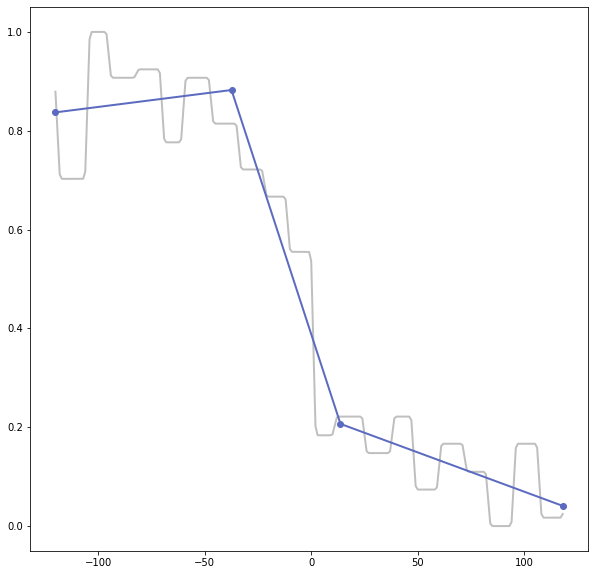

In [69]:
f, ax = plt.subplots(figsize=(10, 10),)


durations = []
for n, trial in enumerate(range(wt_traces_complete.shape[-1])):
    y = wt_traces_complete[1, :, trial]
    
    # scale y between 0, 1
    y = (y - y.min()) / (y.max() - y.min())
    ax.plot(time_frames, y, color="black", lw=2, alpha=.25)

    # fit a piece-wise linear curve
    px, py = segments_fit(time_frames, y, 3)
    ax.plot(px, py, "-o", color=indigo, alpha=1, lw=2)
    durations.append(px[2] - px[1])

    break

    


# axarr[0].set(ylabel="weight norm.", title="FL")
# axarr[1].set(title="FR")
# axarr[2].set(xlabel="time (frames)", ylabel="weight norm.", title="HL")
# axarr[3].set(xlabel="time (frames)", title="HR")

# axarr[0].legend()

### plot durations

low 6.290 ms high 208.333 ms, mean 87.918 ms, median 76.564 ms, std: 61.430 ms


<matplotlib.collections.PathCollection object at 0x7fe7e1f19b50>

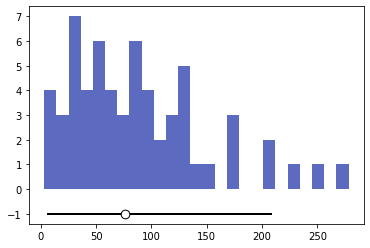

In [66]:
f, ax = plt.subplots()

durations_ms = [frame2ms(d) for d in durations]

low, high = np.percentile(durations_ms, [5, 95])
print(f"low {low:.3f} ms high {high:.3f} ms, mean {np.mean(durations_ms):.3f} ms, median {np.median(durations_ms):.3f} ms, std: {np.std(durations_ms):.3f} ms")

ax.hist(durations_ms, bins=25, color=indigo)
ax.plot([low, high], [-1, -1], "-", color="black", lw=2)
ax.scatter(np.median(durations_ms), -1, color="white", lw=1, ec="black", zorder=100,  s=75)